# Web Scraping for Reddit & Predicting Comments

In this project, we will practice two major skills. Collecting data by scraping a website and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. Use BeautifulSoup to parse the page and extract all results

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import datetime
import pandas as pd
import os
from uuid import uuid4 as uuid  # this is a randomly generated ID
import numpy as np

In [2]:
## YOUR CODE HERE

In [3]:
URL = "http://www.reddit.com"
r = requests.get(URL, headers={"User-agent": str(uuid())})
b = BeautifulSoup(r.text)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /Users/nmolivo/anaconda/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [49]:
print(b.prettify())

<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   reddit: the front page of the internet
  </title>
  <meta content=" reddit, reddit.com, vote, comment, submit " name="keywords"/>
  <meta content="reddit: the front page of the internet" name="description"/>
  <meta content="always" name="referrer"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="/static/opensearch.xml" rel="search" type="application/opensearchdescription+xml"/>
  <link href="https://www.reddit.com/" rel="canonical"/>
  <meta content="width=1024" name="viewport"/>
  <link href="//out.reddit.com" rel="dns-prefetch"/>
  <link href="//out.reddit.com" rel="preconnect"/>
  <link href="//www.redditstatic.com/icon.png" rel="icon" sizes="256x256" type="image/png"/>
  <link href="//www.redditstatic.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="//www.redditstatic.com/icon-touch.png" rel="apple-touch-icon-precomp

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The thread title is within an `<a>` tag with the attribute `data-event-action="title"`.
- The time since the thread was created is within a `<time>` tag with attribute `class="live-timestamp"`.
- The subreddit is within an `<a>` tag with the attribute `class="subreddit hover may-blank"`.
- The number of comments is within an `<a>` tag with the attribute data-event-action="comments"`.

## Write 4 functions to extract these items (one function for each): title, time, subreddit, and number of comments.¶
Example
```python
def extract_title_from_result(result):
    return result.find ...
```

##### - Make sure these functions are robust and can handle cases where the data/field may not be available.
>- Remember to check if a field is empty or None for attempting to call methods on it
>- Remember to use try/except if you anticipate errors.

- **Test** the functions on the results above and simple examples

In [11]:
## YOUR CODE HERE to extract date

def extract_date(b):
    quote_list =[]
    for quote in b.find_all(name='div'):
        if "datetime=" in str(quote):
            quote_list.append(str(quote))
            
    date_list =[]
    for item in quote_list:
        x = item.find("datetime=")+len("datetime=")
        y = item.find("+", x)
        unit = item[x:y].replace('"','').replace("T"," ")
        if unit in date_list:
            pass
        else:
            date_list.append(unit)
        
    return date_list

In [12]:
# ^^ ok, this was NOT the most efficient way to do this.

In [13]:
extract_date(b)

['2017-10-30 09:12:12',
 '2017-10-30 09:27:08',
 '2017-10-30 11:54:00',
 '2017-10-30 10:58:40',
 '2017-10-30 09:03:00',
 '2017-10-30 12:27:01',
 '2017-10-30 07:07:11',
 '2017-10-30 05:40:12',
 '2017-10-30 10:35:40',
 '2017-10-30 10:45:51',
 '2017-10-30 06:50:33',
 '2017-10-30 12:01:25',
 '2017-10-30 10:49:36',
 '2017-10-30 01:39:09',
 '2017-10-30 10:33:59',
 '2017-10-30 04:12:13',
 '2017-10-30 01:51:19',
 '2017-10-30 09:17:14',
 '2017-10-30 05:30:40',
 '2017-10-30 01:15:33',
 '2017-10-30 02:16:24',
 '2017-10-30 09:42:57',
 '2017-10-30 03:43:21',
 '2017-10-30 03:21:35',
 '2017-10-30 05:13:46']

In [14]:
## YOUR CODE HERE to extract title

def extract_title(b):
    title_list =[]
    links = b.findAll("a", {"class":"title"})
    for link in links:
        title_list.append(link.text)

    return title_list

In [15]:
extract_title(b)

["Why don't I ......",
 'The lives of tens of thousands of premature babies could be saved by simply delaying clamping the umbilical cord by one minute, according to Australian doctors.',
 'Paul Manafort, Who Once Ran Trump Campaign, Told to Surrender',
 'Record surge in atmospheric CO2 in 2016',
 'Anteater hit and run',
 'Paul Manafort, Who Once Ran Trump Campaign, Told to Surrender',
 'Would you?',
 'Postgame Thread ⚾ Dodgers 12 @ Astros 13',
 "MRW It's October 30th and my wife still doesn't understand why it's too early for Christmas",
 'Rich millennials are ditching the golf communities of their parents for a new kind of neighborhood - Agrihoods are built around working farms and are replacing the once-popular golf communities favored by Baby Boomers.',
 'My goose attempting to dive but flipping herself upside down.',
 'Paul Manafort and Rick Gates to be indicted',
 'HMB while I do a solo keg stand',
 'Star Trek Discovery Actor Anthony Rapp: Kevin Spacey Made A Sexual Advance Towar

In [16]:
## YOUR CODE HERE to extract subreddit

def extract_subreddit(b):
    taglist =[]
    links = b.findAll("p", {"class":"tagline"})
    for link in links:
        taglist.append(link.text)    
    subred_list=[]
    for item in taglist:
        x = item.find("r/")+len("r/")
        y = len(item)
        unit = item[x:y]
        subred_list.append(unit)

    return subred_list

In [17]:
extract_subreddit(b)

['PoliticalHumor',
 'worldnews',
 'worldnews',
 'science',
 'AnimalsBeingJerks',
 'news',
 'harrypotter',
 'baseball',
 'reactiongifs',
 'Futurology',
 'AnimalsBeingDerps',
 'RussiaLago',
 'holdmybeer',
 'television',
 'rarepuppers',
 'news',
 'pics',
 'Android',
 'photoshopbattles',
 'BlackPeopleTwitter',
 'todayilearned',
 'wholesomememes',
 'mildlyinteresting',
 'MurderedByWords',
 'sports']

In [18]:
## YOUR CODE HERE to extract comments

def extract_comments(b):
    taglist =[]
    links = b.findAll("li")
    for link in links:
        taglist.append(link.text)
        
    comm_list=[]
    for unit in taglist:
        if unit.find("comments") >0:
            space = unit.find(" ")
            comm_list.append(unit[0:space])
        else:
            pass

    return comm_list

In [19]:
extract_comments(b)

['445',
 '354',
 '447',
 '196',
 '77',
 '250',
 '229',
 '3251',
 '44',
 '113',
 '68',
 '5',
 '25',
 '7400',
 '14',
 '5167',
 '340',
 '224',
 '138',
 '198',
 '848',
 '42',
 '141',
 '3361',
 '591']

In [20]:
## YOUR CODE HERE to extract author

def extract_user(b):
    user_list =[]
    aa = b.findAll("a", {"class":"author"})
    for a in aa:
        user_list.append(a.text)

    return user_list

In [21]:
extract_user(b)

['SMRNS2017',
 'lapapinton',
 'charging_bull',
 'ripsgod',
 '-N3ptun3-',
 'Spudgun888',
 'brittany16691',
 'BaseballBot',
 'PapaNixon',
 'mvea',
 'GraeDaBoss',
 'ghqwertt',
 'Ima_Grab_Yo_Snatch',
 'GavinGunhold',
 '-N3ptun3-',
 'piede',
 'MURPHtheSURF',
 'Mearsu',
 'derawin07',
 'L1FE1SP01NTLESS',
 'Rupert_YT',
 'Thou_Art_God',
 'yelnats87',
 'TheTrueForester',
 'FAX_ME_YOUR_BOTTOM']

Now, to scale up our scraping, we need to accumulate more results.

First, look at the source of a Reddit.com page: (https://www.reddit.com/).
Try manually changing the page by clicking the 'next' button on the bottom. Look at how the url changes.

After leaving the Reddit homepage, the URLs should look something like this:
```
https://www.reddit.com/?count=25&after=t3_787ptc
```

The URL here has two query parameters
- count is the result number that the page starts with
- after is the unique id of the last result on the _previous_ page

In order to scrape lots of pages from Reddit, we'll have to change these parameters every time we make a new request so that we're not just scraping the same page over and over again. Incrementing the count by 25 every time will be easy, but the bizarre code after `after` is a bit trickier.

To start off, let's look at a block of HTML from a Reddit page to see how we might solve this problem:
```html
<div class=" thing id-t3_788tye odd gilded link " data-author="LordSneaux" data-author-fullname="t2_j3pty" data-comments-count="1548" data-context="listing" data-domain="v.redd.it" data-fullname="t3_788tye" data-kind="video" data-num-crossposts="0" data-permalink="/r/funny/comments/788tye/not_all_heroes_wear_capes/" data-rank="25" data-score="51468" data-subreddit="funny" data-subreddit-fullname="t5_2qh33" data-timestamp="1508775581000" data-type="link" data-url="https://v.redd.it/ush0rh2tultz" data-whitelist-status="all_ads" id="thing_t3_788tye" onclick="click_thing(this)">
      <p class="parent">
      </p>
      <span class="rank">
       25
      </span>
      <div class="midcol unvoted">
       <div aria-label="upvote" class="arrow up login-required access-required" data-event-action="upvote" role="button" tabindex="0">
       </div>
       <div class="score dislikes" title="53288">
        53.3k
       </div>
       <div class="score unvoted" title="53289">
        53.3k
       </div>
       <div class="score likes" title="53290">
        53.3k
       </div>
       <div aria-label="downvote" class="arrow down login-required access-required" data-event-action="downvote" role="button" tabindex="0">
       </div>
      </div>
```

Notice that within the `div` tag there is an attribute called `id` and it is set to `"thing_t3_788tye"`. By finding the last ID on your scraped page, you can tell your _next_ request where to start (pass everything after "thing_").

For more info on this, you can take a look at the [Reddit API docs](https://github.com/reddit/reddit/wiki/JSON)

## Write one more function that finds the last `id` on the page, and stores it.

In [22]:
## YOUR CODE HERE
def extract_last_articleid(b):
    id_list =[]
    divs = b.findAll("div", {"class":"thing"})
    for div in divs:
        id_list.append(div["data-fullname"])
    x = id_list[-1]

    return str(x)

In [23]:
extract_last_articleid(b)

't3_79lpti'

## (Optional) Collect more information

While we only require you to collect four features, there may be other info that you can find on the results page that might be useful. Feel free to write more functions so that you have more interesting and useful data.

In [100]:
## YOUR CODE HERE
#I will add this after all the top 100's are scraped

In [ ]:
#meant to be run at a similar time to the previous cell, but not a requirement. 

karmalist =[]
for user in list(df["user"]):
    url = "https://www.reddit.com/user/" + str(user)
    r = requests.get(url, headers={"User-agent": str(uuid())})
    b = BeautifulSoup(r.text, "lxml")
    if len(b) == 0:
        karmalist.append((user, None, None))
        continue
    
    kpoints = b.findAll("span", {"class":"karma"})
    comment_karma=None
    post_karma=None
    for kpoint in kpoints:
        if "comment-karma" in kpoint["class"]:
            comment_karma=kpoint.text.replace(",","")
        else:
            post_karma=kpoint.text.replace(",","")
    karmalist.append((user, post_karma,comment_karma))

In [ ]:
karma_df = pd.DataFrame(karmalist,columns=["user","post-karma", 'comment-karma'])

In [ ]:
df = df.merge(karma_df.drop_duplicates(subset="user"), on="user", how = "left")

## Now, let's put it all together.

Use the functions you wrote above to parse out the 4 fields - title, time, subreddit, and number of comments. Create a dataframe from the results with those 4 columns.

In [29]:
a_dict = {"title": extract_title(b), "subreddit": extract_subreddit(b),"comments": extract_comments(b), "user": extract_user(b)}

In [30]:
df = pd.DataFrame(a_dict)

In [31]:
df.head()

,comments,subreddit,title,user
0,445,PoliticalHumor,Why don't I ......,SMRNS2017
1,354,worldnews,The lives of tens of thousands of premature ba...,lapapinton
2,447,worldnews,"Paul Manafort, Who Once Ran Trump Campaign, To...",charging_bull
3,196,science,Record surge in atmospheric CO2 in 2016,ripsgod
4,77,AnimalsBeingJerks,Anteater hit and run,-N3ptun3-


In [32]:
#meant to be run at a similar time to the previous cell, but not a requirement. 

karmalist =[]
for user in list(df["user"]):
    url = "https://www.reddit.com/user/" + str(user)
    r = requests.get(url, headers={"User-agent": str(uuid())})
    b = BeautifulSoup(r.text, "lxml")
    if len(b) == 0:
        karmalist.append((user, None, None))
        continue
    
    kpoints = b.findAll("span", {"class":"karma"})
    comment_karma=None
    post_karma=None
    for kpoint in kpoints:
        if "comment-karma" in kpoint["class"]:
            comment_karma=kpoint.text.replace(",","")
        else:
            post_karma=kpoint.text.replace(",","")
    karmalist.append((user, post_karma,comment_karma))

In [33]:
karma_df = pd.DataFrame(karmalist,columns=["user","post-karma", 'comment-karma'])

In [34]:
df = df.merge(karma_df.drop_duplicates(subset="user"), on="user", how = "left")

In [35]:
len(df)

25

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [37]:
# Export to csv
file_name = time.strftime('top25_%Y%m%d%H%M.csv', time.gmtime())
df.to_csv(os.path.join('reddit', file_name), index=False)

Here is the template of the scraper we are using! It will look messier when implemented because we will be inserting some large blocks of code where there is ##
```python
count = 0
while count < 1000:
    # scrape top 100 reddit posts
    ##
    # save as timestamped csv
    ##
    count += 1
    time.sleep(600) # 10 minutes

files = os.listdir('reddit')
data = pd.DataFrame()
for file in files:
    df = pd.read_csv(os.path.join('reddit', file))
    df['time_collected'] = file.split('_')[1].split('.')[0]
    data = pd.concat(data, df)

unique_users = list(set(data.user)) #set is like .unique() but a vectorized method, so it's faster

# get user info for unique users as karma_df
##
full_data = data.merge(karma_df, on='user', how='left')

```

In [ ]:
count = 0
max_count = 1000
while count < max_count:
    print(count)
    # scrape top 100 reddit posts every X period of time
    #url_template = "http://www.reddit.com/?count={}&after={}"
    max_results = 100 # Set this to a high-value (5000) to generate more results. 
    # Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

    col1=[]
    col2=[]
    col3=[]
    col4=[]
    col5=[]
    last_id = None
    for start in range(0, max_results, 25):
        if last_id is None:
            url = "http://reddit.com/r/popular/?geo_filter=US_DC"
        else:
            url= "http://www.reddit.com/r/popular/?geo_filter=US_DC/?count=" + str(start) + "&after="+ str(last_id)

        r = requests.get(url, headers={"User-agent": str(uuid())})
        b = BeautifulSoup(r.text, "lxml")

        col1+=extract_title(b)
        col2+=extract_subreddit(b)
        col3+=extract_date(b)
        col4+=extract_comments(b)
        col5+=extract_user(b)

    #variables:
    #col1 = title
    #col2 = subreddit
    #col3 = date
    #col4 = comments
    #col5 = user
        last_id = extract_last_articleid(b)
    df = pd.DataFrame(list(zip(col1, col2, col3, col4, col5)),columns=["title","subreddit", "date", "comments", "user"])
    
    # save as timestamped csv
    file_name = time.strftime('top100_%Y%m%d%H%M.csv', time.gmtime())
    df.to_csv(os.path.join('reddit', file_name), index=False)
    
    count += 1 #add one to the count so this stops
    if count < max_count: # no need to sleep on last iteration
        time.sleep(120) # 2 minutes
print('Done collecting post data')

In [40]:
#read in all files and merge.
print('Reading in data')
files = os.listdir('reddit')
for i, file in enumerate(files):
    df = pd.read_csv(os.path.join('reddit', file))
    df['time_collected'] = file.split('_')[1].split('.')[0]
    df['rank'] = df.index
    if i == 0:
        data = pd.DataFrame(df)
    else:
        data = pd.concat([data, df])

Reading in data


In [75]:
#not every file got all 100. Perhaps the page updated and some exact duplicates were collected and our function removes
#exact duplicates.
data

,Unnamed: 0,comments,date,rank,subreddit,time_collected,title,user
0,NaN,441.0,2017-10-28 17:34:09,0,CrappyDesign,201710282341,"Requires 3 AAA batteries, in the most annoying...",Peef_Rimgar420
1,NaN,1859.0,2017-10-28 23:18:15,1,CFB,201710282341,[Postgame Thread] Ohio State Defeats Penn Stat...,CFB_Referee
2,NaN,711.0,2017-10-28 18:12:11,2,mildlyinteresting,201710282341,Paint-chipping making the wheelchair guy look ...,Ribwichs
3,NaN,1249.0,2017-10-28 15:51:41,3,videos,201710282341,This guy made a video of various rappers count...,floopykid
4,NaN,168.0,2017-10-28 18:52:24,4,pics,201710282341,Lady at Yellowstone took our picture,nowthatssomeusername
5,NaN,220.0,2017-10-28 17:02:43,5,AnimalsBeingDerps,201710282341,Dog thinks it's a shark,1Voice1Life
6,NaN,2761.0,2017-10-28 14:11:03,6,LifeProTips,201710282341,LPT: Most people at the gym are too busy with ...,lizardman3000000
7,NaN,963.0,2017-10-28 15:17:07,7,funny,201710282341,So much respect for this guy.,toiletskidmarks
8,NaN,293.0,2017-10-28 14:38:26,8,thisismylifenow,201710282341,I AM THE Q-tip HOLDER,GallowBoob
9,NaN,985.0,2017-10-28 22:56:37,9,CFB,201710282341,[Postgame Thread] Iowa State Defeats TCU 14-7,elefish92


In [59]:
len(list(set(data.user)))

2424

In [58]:
# get user info for unique users as karma_df
unique_users = list(set(data.user)) #set is like .unique() but a vectorized method, so it's faster
print('Getting user data')
karmalist =[]
for user in unique_users:
    url = "https://www.reddit.com/user/" + str(user)
    r = requests.get(url, headers={"User-agent": str(uuid())})
    b = BeautifulSoup(r.text, "lxml")
    if len(b) == 0:
        karmalist.append((user, None, None))
        continue
    
    kpoints = b.findAll("span", {"class":"karma"})
    comment_karma=None
    post_karma=None
    for kpoint in kpoints:
        if "comment-karma" in kpoint["class"]:
            comment_karma=kpoint.text.replace(",","")
        else:
            post_karma=kpoint.text.replace(",","")
    karmalist.append((user, post_karma,comment_karma))
    
karma_df = pd.DataFrame(karmalist,columns=["user","post-karma", 'comment-karma'])

Getting user data


In [77]:
full_data = data.merge(karma_df.drop_duplicates(subset="user"), on="user", how = "left")
#there's an unnamed column to remove.
full_data = full_data[["comments", "date", "rank", "subreddit", "time_collected","title", "user", "post-karma", 
                       "comment-karma"]]

In [80]:
full_data.to_csv('full_reddit_data.csv')

In [68]:
# what does this code do?
files = os.listdir('reddit')
data = pd.DataFrame()
current_id = 0
for i, file in enumerate(files):
    df = pd.read_csv(os.path.join('reddit', file))
    df['time_collected'] = file.split('_')[1].split('.')[0]
    df['rank'] = df.index
    #df.set_index(list(range(current_id, current_id + len(df))))
    current_id += len(df)
    data = pd.concat([data, df])

In [82]:
full_data.to_csv('full_reddit_data.csv', index=False)

## Predicting comments using Random Forests + Another Classifier

#### Load in the the data of scraped results

In [ ]:
## YOUR CODE HERE

In [93]:
full_data = pd.read_csv('full_reddit_data.csv')

In [94]:
full_data.head(10)

,comments,date,rank,subreddit,time_collected,title,user,post-karma,comment-karma
0,441.0,2017-10-28 17:34:09,0,CrappyDesign,201710282341,"Requires 3 AAA batteries, in the most annoying...",Peef_Rimgar420,8560,325.0
1,1859.0,2017-10-28 23:18:15,1,CFB,201710282341,[Postgame Thread] Ohio State Defeats Penn Stat...,CFB_Referee,313858,2845.0
2,711.0,2017-10-28 18:12:11,2,mildlyinteresting,201710282341,Paint-chipping making the wheelchair guy look ...,Ribwichs,7018,61.0
3,1249.0,2017-10-28 15:51:41,3,videos,201710282341,This guy made a video of various rappers count...,floopykid,22034,38536.0
4,168.0,2017-10-28 18:52:24,4,pics,201710282341,Lady at Yellowstone took our picture,nowthatssomeusername,7001,64.0
5,220.0,2017-10-28 17:02:43,5,AnimalsBeingDerps,201710282341,Dog thinks it's a shark,1Voice1Life,NaN,NaN
6,2761.0,2017-10-28 14:11:03,6,LifeProTips,201710282341,LPT: Most people at the gym are too busy with ...,lizardman3000000,25710,186.0
7,963.0,2017-10-28 15:17:07,7,funny,201710282341,So much respect for this guy.,toiletskidmarks,13816,541.0
8,293.0,2017-10-28 14:38:26,8,thisismylifenow,201710282341,I AM THE Q-tip HOLDER,GallowBoob,NaN,NaN
9,985.0,2017-10-28 22:56:37,9,CFB,201710282341,[Postgame Thread] Iowa State Defeats TCU 14-7,elefish92,24850,17525.0


In [95]:
new_profiles = full_data[pd.isnull(full_data["comment-karma"])]

In [96]:
# get user info for unique users as karma_df
unique_users = list(set(new_profiles["user"])) #set is like .unique() but a vectorized method, so it's faster
karmalist =[]
for user in unique_users:
    url = "https://www.reddit.com/user/" + str(user)
    r = requests.get(url, headers={"User-agent": str(uuid())})
    b = BeautifulSoup(r.text, "lxml")
    if len(b) == 0:
        karmalist.append((user, None, None))
        continue
    
    kpoints = b.findAll("div", {"class":"ProfileSidebar__counterInfo"})
    comment_karma=None
    post_karma=None
    for kpoint in kpoints:
        s = kpoint.text.find(" ")
        
        x = str(kpoint).find("<br/>")+len("<br/>")
        y = str(kpoint).find(" ", x)
        
        post_karma=kpoint.text[0:s].replace(",","")
        comment_karma=str(kpoint)[x:y].replace(",","")
    karmalist.append((user, post_karma,comment_karma))
    
new_karma_df = pd.DataFrame(karmalist,columns=["user","post-karma", 'comment-karma'])

In [97]:
new_karma_df

,user,post-karma,comment-karma
0,51isnotprime,7214,3014
1,ganggxnggvng,126027,363025
2,Cortimer,1869,293
3,I_AM_STILL_A_IDIOT,357428,351660
4,Redzit69,53899,1727
5,ExpFilm_Student,None,None
6,Moni3,10402,34623
7,IfaqYurmama,70509,89154
8,BrandonKatrena,54086,19
9,F1NAC,5404,3980


In [98]:
new_profiles = full_data[pd.isnull(full_data["comment-karma"])]

In [99]:
a = full_data.merge(new_karma_df, how='left', left_on='user', right_on='user')

In [100]:
def convert_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [101]:
a['post-karma_x'] = a['post-karma_x'].apply(lambda x: convert_float(x))
a['post-karma_y'] = a['post-karma_y'].apply(lambda x: convert_float(x))
a['post-karma'] = a['post-karma_x']
a['post-karma'].fillna(a['post-karma_y'], inplace=True)

In [102]:
a['comment-karma_x'] = a['comment-karma_x'].apply(lambda x: convert_float(x))
a['comment-karma_y'] = a['comment-karma_y'].apply(lambda x: convert_float(x))
a['comment-karma'] = a['comment-karma_x']
a['comment-karma'].fillna(a['comment-karma_y'], inplace=True)

In [103]:
a

,comments,date,rank,subreddit,time_collected,title,user,post-karma_x,comment-karma_x,post-karma_y,comment-karma_y,post-karma,comment-karma
0,441.0,2017-10-28 17:34:09,0,CrappyDesign,201710282341,"Requires 3 AAA batteries, in the most annoying...",Peef_Rimgar420,8560.0,325.0,NaN,NaN,8560.0,325.0
1,1859.0,2017-10-28 23:18:15,1,CFB,201710282341,[Postgame Thread] Ohio State Defeats Penn Stat...,CFB_Referee,313858.0,2845.0,NaN,NaN,313858.0,2845.0
2,711.0,2017-10-28 18:12:11,2,mildlyinteresting,201710282341,Paint-chipping making the wheelchair guy look ...,Ribwichs,7018.0,61.0,NaN,NaN,7018.0,61.0
3,1249.0,2017-10-28 15:51:41,3,videos,201710282341,This guy made a video of various rappers count...,floopykid,22034.0,38536.0,NaN,NaN,22034.0,38536.0
4,168.0,2017-10-28 18:52:24,4,pics,201710282341,Lady at Yellowstone took our picture,nowthatssomeusername,7001.0,64.0,NaN,NaN,7001.0,64.0
5,220.0,2017-10-28 17:02:43,5,AnimalsBeingDerps,201710282341,Dog thinks it's a shark,1Voice1Life,NaN,NaN,6476268.0,34958.0,6476268.0,34958.0
6,2761.0,2017-10-28 14:11:03,6,LifeProTips,201710282341,LPT: Most people at the gym are too busy with ...,lizardman3000000,25710.0,186.0,NaN,NaN,25710.0,186.0
7,963.0,2017-10-28 15:17:07,7,funny,201710282341,So much respect for this guy.,toiletskidmarks,13816.0,541.0,NaN,NaN,13816.0,541.0
8,293.0,2017-10-28 14:38:26,8,thisismylifenow,201710282341,I AM THE Q-tip HOLDER,GallowBoob,NaN,NaN,17536350.0,833693.0,17536350.0,833693.0
9,985.0,2017-10-28 22:56:37,9,CFB,201710282341,[Postgame Thread] Iowa State Defeats TCU 14-7,elefish92,24850.0,17525.0,NaN,NaN,24850.0,17525.0


In [104]:
full_data = a[["comments", "date", "rank", "subreddit", "time_collected", "title", "user", "post-karma", "comment-karma"]]

In [105]:
full_data

,comments,date,rank,subreddit,time_collected,title,user,post-karma,comment-karma
0,441.0,2017-10-28 17:34:09,0,CrappyDesign,201710282341,"Requires 3 AAA batteries, in the most annoying...",Peef_Rimgar420,8560.0,325.0
1,1859.0,2017-10-28 23:18:15,1,CFB,201710282341,[Postgame Thread] Ohio State Defeats Penn Stat...,CFB_Referee,313858.0,2845.0
2,711.0,2017-10-28 18:12:11,2,mildlyinteresting,201710282341,Paint-chipping making the wheelchair guy look ...,Ribwichs,7018.0,61.0
3,1249.0,2017-10-28 15:51:41,3,videos,201710282341,This guy made a video of various rappers count...,floopykid,22034.0,38536.0
4,168.0,2017-10-28 18:52:24,4,pics,201710282341,Lady at Yellowstone took our picture,nowthatssomeusername,7001.0,64.0
5,220.0,2017-10-28 17:02:43,5,AnimalsBeingDerps,201710282341,Dog thinks it's a shark,1Voice1Life,6476268.0,34958.0
6,2761.0,2017-10-28 14:11:03,6,LifeProTips,201710282341,LPT: Most people at the gym are too busy with ...,lizardman3000000,25710.0,186.0
7,963.0,2017-10-28 15:17:07,7,funny,201710282341,So much respect for this guy.,toiletskidmarks,13816.0,541.0
8,293.0,2017-10-28 14:38:26,8,thisismylifenow,201710282341,I AM THE Q-tip HOLDER,GallowBoob,17536350.0,833693.0
9,985.0,2017-10-28 22:56:37,9,CFB,201710282341,[Postgame Thread] Iowa State Defeats TCU 14-7,elefish92,24850.0,17525.0


In [106]:
full_data['time_collected'] = full_data['time_collected'].astype(str)
full_data['time_collected'] = full_data['time_collected'].apply(lambda x: x[0:4] + '-' + x[4:6] + '-' + x[6:8] + ' ' + x[8:10] + ':' + x[10:])
full_data['time_collected'] = pd.to_datetime(full_data['time_collected'])

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [107]:
full_data['date'] = pd.to_datetime(full_data['date'])

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [118]:
full_data['date'] = full_data['date'].apply(lambda x: x.tz_localize('US/Eastern'))
full_data['time_collected'] = full_data['time_collected'].apply(lambda x: x.tz_localize('UTC').tz_convert('US/Eastern'))

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [119]:
full_data.head()

,comments,date,rank,subreddit,time_collected,title,user,post-karma,comment-karma,age-in-hrs
0,441.0,2017-10-28 17:34:09-04:00,0,CrappyDesign,2017-10-28 19:41:00-04:00,"Requires 3 AAA batteries, in the most annoying...",Peef_Rimgar420,8560.0,325.0,17.885833
1,1859.0,2017-10-28 23:18:15-04:00,1,CFB,2017-10-28 19:41:00-04:00,[Postgame Thread] Ohio State Defeats Penn Stat...,CFB_Referee,313858.0,2845.0,23.620833
2,711.0,2017-10-28 18:12:11-04:00,2,mildlyinteresting,2017-10-28 19:41:00-04:00,Paint-chipping making the wheelchair guy look ...,Ribwichs,7018.0,61.0,18.519722
3,1249.0,2017-10-28 15:51:41-04:00,3,videos,2017-10-28 19:41:00-04:00,This guy made a video of various rappers count...,floopykid,22034.0,38536.0,16.178056
4,168.0,2017-10-28 18:52:24-04:00,4,pics,2017-10-28 19:41:00-04:00,Lady at Yellowstone took our picture,nowthatssomeusername,7001.0,64.0,19.190000


In [136]:
from datetime import datetime

def hours_between(d1, d2):
    td = d2 - d1
    return abs(td.total_seconds()/3600)

In [137]:
full_data["age-in-hrs"] = full_data.apply(lambda x: hours_between(x["time_collected"], x['date']), axis =1)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [138]:
full_data.head()

,comments,date,rank,subreddit,time_collected,title,user,post-karma,comment-karma,age-in-hrs
0,441.0,2017-10-28 17:34:09-04:00,0,CrappyDesign,2017-10-28 19:41:00-04:00,"Requires 3 AAA batteries, in the most annoying...",Peef_Rimgar420,8560.0,325.0,2.114167
1,1859.0,2017-10-28 23:18:15-04:00,1,CFB,2017-10-28 19:41:00-04:00,[Postgame Thread] Ohio State Defeats Penn Stat...,CFB_Referee,313858.0,2845.0,3.620833
2,711.0,2017-10-28 18:12:11-04:00,2,mildlyinteresting,2017-10-28 19:41:00-04:00,Paint-chipping making the wheelchair guy look ...,Ribwichs,7018.0,61.0,1.480278
3,1249.0,2017-10-28 15:51:41-04:00,3,videos,2017-10-28 19:41:00-04:00,This guy made a video of various rappers count...,floopykid,22034.0,38536.0,3.821944
4,168.0,2017-10-28 18:52:24-04:00,4,pics,2017-10-28 19:41:00-04:00,Lady at Yellowstone took our picture,nowthatssomeusername,7001.0,64.0,0.810000


In [139]:
full_data.to_csv('full_reddit_data.csv', index=False)

#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

In [140]:
## YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import sklearn.datasets as datasets

In [141]:
full_data["comments"].quantile(q=0.85)

890.0

In [142]:
full_data["high-comments"] = [1 if x > full_data["comments"].quantile(q=0.85) else 0 for x in full_data['comments']]

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [148]:
full_data["hour-posted"] = full_data.apply(lambda x: x['date'].hour, axis =1)

In [149]:
full_data

,comments,date,rank,subreddit,time_collected,title,user,post-karma,comment-karma,age-in-hrs,high-comments,hour,hour-posted
0,441.0,2017-10-28 17:34:09-04:00,0,CrappyDesign,2017-10-28 19:41:00-04:00,"Requires 3 AAA batteries, in the most annoying...",Peef_Rimgar420,8560.0,325.0,2.114167,0,10,17
1,1859.0,2017-10-28 23:18:15-04:00,1,CFB,2017-10-28 19:41:00-04:00,[Postgame Thread] Ohio State Defeats Penn Stat...,CFB_Referee,313858.0,2845.0,3.620833,1,10,23
2,711.0,2017-10-28 18:12:11-04:00,2,mildlyinteresting,2017-10-28 19:41:00-04:00,Paint-chipping making the wheelchair guy look ...,Ribwichs,7018.0,61.0,1.480278,0,10,18
3,1249.0,2017-10-28 15:51:41-04:00,3,videos,2017-10-28 19:41:00-04:00,This guy made a video of various rappers count...,floopykid,22034.0,38536.0,3.821944,1,10,15
4,168.0,2017-10-28 18:52:24-04:00,4,pics,2017-10-28 19:41:00-04:00,Lady at Yellowstone took our picture,nowthatssomeusername,7001.0,64.0,0.810000,0,10,18
5,220.0,2017-10-28 17:02:43-04:00,5,AnimalsBeingDerps,2017-10-28 19:41:00-04:00,Dog thinks it's a shark,1Voice1Life,6476268.0,34958.0,2.638056,0,10,17
6,2761.0,2017-10-28 14:11:03-04:00,6,LifeProTips,2017-10-28 19:41:00-04:00,LPT: Most people at the gym are too busy with ...,lizardman3000000,25710.0,186.0,5.499167,1,10,14
7,963.0,2017-10-28 15:17:07-04:00,7,funny,2017-10-28 19:41:00-04:00,So much respect for this guy.,toiletskidmarks,13816.0,541.0,4.398056,1,10,15
8,293.0,2017-10-28 14:38:26-04:00,8,thisismylifenow,2017-10-28 19:41:00-04:00,I AM THE Q-tip HOLDER,GallowBoob,17536350.0,833693.0,5.042778,0,10,14
9,985.0,2017-10-28 22:56:37-04:00,9,CFB,2017-10-28 19:41:00-04:00,[Postgame Thread] Iowa State Defeats TCU 14-7,elefish92,24850.0,17525.0,3.260278,1,10,22


#### Thought experiment: What is the baseline accuracy for this model?

Baseline accuracy for this model will be if it can predict a 'viral' reddit post, definition of 'viral' being the top 15% comment count.

#### EDA

In [154]:
%matplotlib inline

In [150]:
full_data['age-in-hrs-int'] = full_data['age-in-hrs'].astype(int)

In [152]:
by_time = full_data.groupby('age-in-hrs-int')['comments'].mean().reset_index()
by_time.head()

,age-in-hrs-int,comments
0,0,338.827723
1,1,377.472455
2,2,422.340780
3,3,474.231038
4,4,515.989068


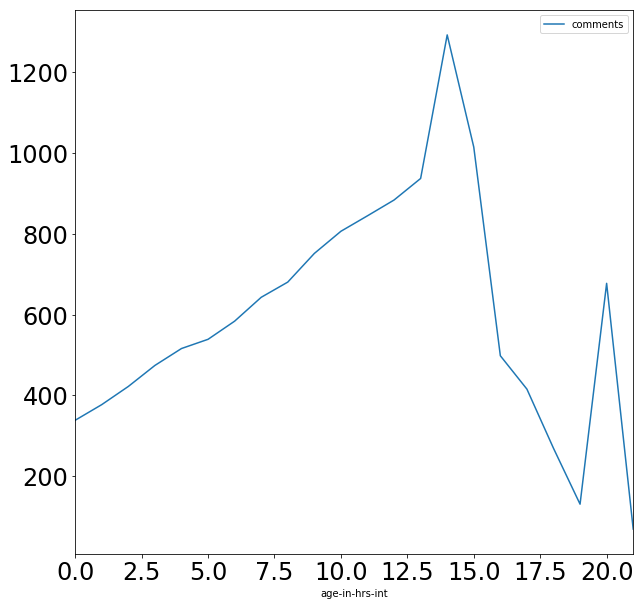

In [170]:
by_time.plot(x='age-in-hrs-int', y='comments', kind='line', figsize = (10,10), fontsize=24, legend=14)

In [209]:
by_subreddit = full_data.groupby('subreddit')['comments'].mean().reset_index()
pop_subreddits = by_subreddit.sort_values("comments", ascending=False)[0:10]

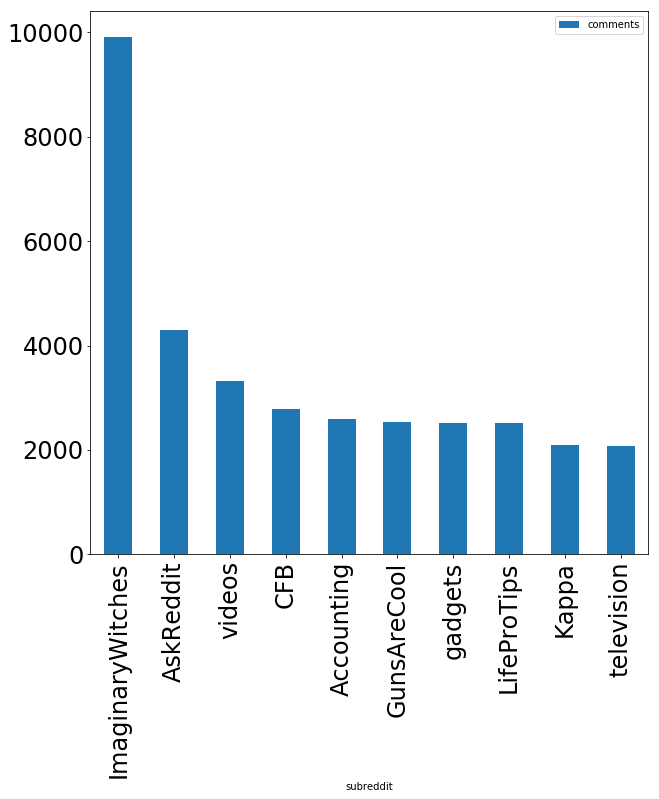

In [210]:
pop_subreddits.plot(x='subreddit', y='comments', kind='bar', figsize = (10,10), fontsize=24, legend=14)

In [160]:
subreddit_by_time = full_data.groupby(['subreddit', 'age-in-hrs-int'])['comments'].mean().reset_index()
subreddit_by_time.head()

,subreddit,age-in-hrs-int,comments
0,13or30,5,35.500000
1,2healthbars,1,11.000000
2,2healthbars,2,17.840000
3,2healthbars,3,37.107143
4,2healthbars,4,66.206897


In [163]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
subreddit_by_time_2 = pd.pivot_table(subreddit_by_time, values='comments', columns='subreddit', index='age-in-hrs-int')
subreddit_by_time_2.head()

subreddit,13or30,2healthbars,2meirl4meirl,30ROCK,49ers,90DayFiance,AFCON,ANormalDayInRussia,ATBGE,AbandonedPorn,...,writing,wtfstockphotos,xboxone,xkcd,xmen,xxfitness,youdontsurf,youseeingthisshit,youtubehaiku,zelda
age-in-hrs-int,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,63.596154,NaN,52.0,2063.0,NaN,28.461538,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,NaN,7.000000,634.0,34.829268,NaN
1,NaN,11.000000,132.967742,NaN,NaN,9.0,25.0,19.615385,NaN,86.0,...,373.0,NaN,NaN,NaN,6.0,NaN,6.666667,NaN,71.333333,NaN
2,NaN,17.840000,179.562500,NaN,NaN,212.0,NaN,10.571429,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,62.500000,NaN
3,NaN,37.107143,194.857143,NaN,5.0,NaN,NaN,11.666667,142.000000,NaN,...,NaN,5.0,NaN,NaN,107.0,NaN,14.666667,NaN,223.333333,NaN
4,NaN,66.206897,210.766667,NaN,NaN,NaN,NaN,NaN,116.444444,68.0,...,NaN,NaN,351.0,NaN,NaN,NaN,16.000000,NaN,189.500000,NaN


In [197]:
max_values = pd.DataFrame(subreddit_by_time_2.apply(lambda x: max(x.fillna(0)), axis=0), columns=['max_value'])

In [198]:
max_values.head()

,max_value
subreddit,
13or30,35.500000
2healthbars,130.000000
2meirl4meirl,266.687500
30ROCK,21.333333
49ers,52.000000


In [199]:
max_values.sort_values(by='max_value', inplace=True, ascending=False)

In [200]:
max_values.head()

,max_value
subreddit,
ImaginaryWitches,9919.000000
AskReddit,8850.000000
television,5452.457143
videos,5329.583333
Accounting,5142.000000


In [193]:
max_subreddits = list(max_values[:10].index)

In [201]:
subreddit_by_time_3 = subreddit_by_time_2[max_subreddits]

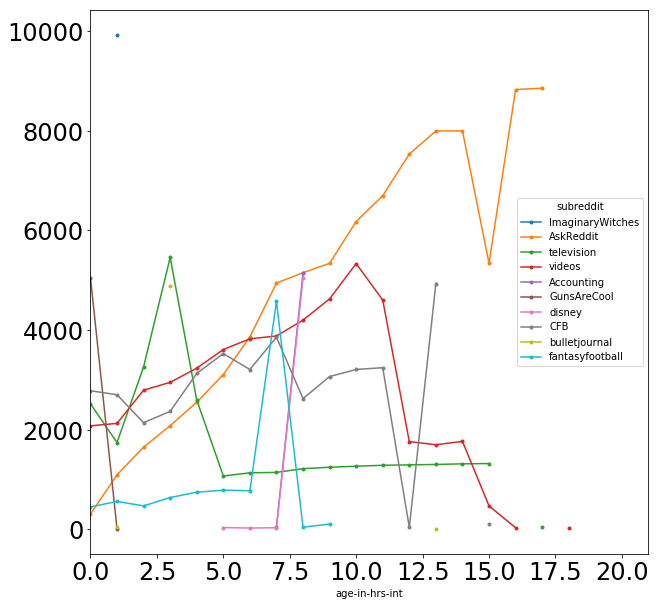

In [205]:
subreddit_by_time_3.plot(style='.-', figsize=(10,10), fontsize = 24, )

In [220]:
unique_posts = full_data.drop_duplicates(subset='title')
pop_auth_unique_posts = unique_posts.groupby('user')['title'].count()
pop_auth_unique_posts.head()

user
-N3ptun3-               10
-melodymelodymelody-     1
13704                    1
14chickc                 1
19djafoij02              1
Name: title, dtype: int64

In [232]:
pop_auth_1 = pd.DataFrame(pop_auth_unique_posts).sort_values("title", ascending = False)

In [235]:
len(pop_auth_1[pop_auth_1["title"] ==1])

2273

In [236]:
len(pop_auth_1)

2397

In [237]:
2273/2397

0.9482686691697956

In [227]:
pop_auth_2 = pd.DataFrame(pop_auth_unique_posts).sort_values("title", ascending = False)[0:10]

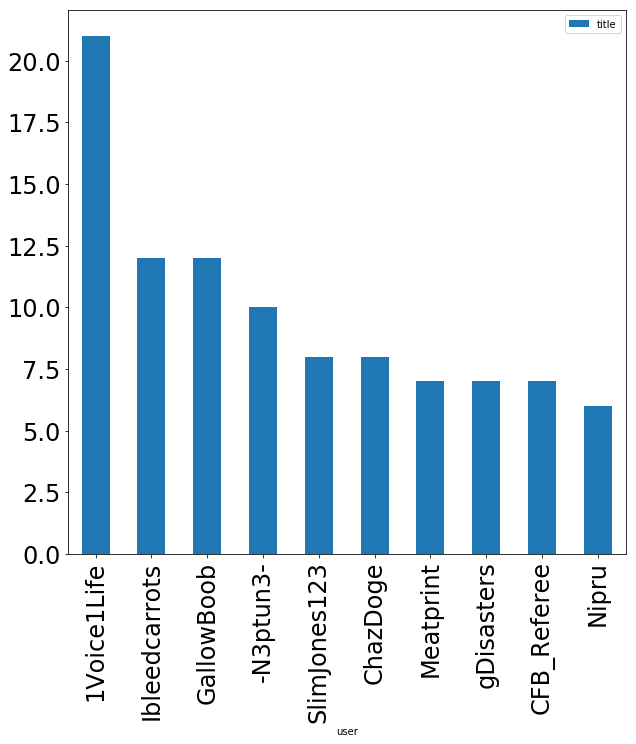

In [230]:
pop_auth_2.plot(kind='bar', fontsize=24, figsize=(10,10))

In [213]:
#ok, now to post the most popular author:
pop_auth = full_data.groupby(['user', 'post-karma','comment-karma', 'age-in-hrs-int'])['comments'].mean().reset_index()

In [215]:
full_data.head()

,comments,date,rank,subreddit,time_collected,title,user,post-karma,comment-karma,age-in-hrs,high-comments,hour,hour-posted,age-in-hrs-int
0,441.0,2017-10-28 17:34:09-04:00,0,CrappyDesign,2017-10-28 19:41:00-04:00,"Requires 3 AAA batteries, in the most annoying...",Peef_Rimgar420,8560.0,325.0,2.114167,0,10,17,2
1,1859.0,2017-10-28 23:18:15-04:00,1,CFB,2017-10-28 19:41:00-04:00,[Postgame Thread] Ohio State Defeats Penn Stat...,CFB_Referee,313858.0,2845.0,3.620833,1,10,23,3
2,711.0,2017-10-28 18:12:11-04:00,2,mildlyinteresting,2017-10-28 19:41:00-04:00,Paint-chipping making the wheelchair guy look ...,Ribwichs,7018.0,61.0,1.480278,0,10,18,1
3,1249.0,2017-10-28 15:51:41-04:00,3,videos,2017-10-28 19:41:00-04:00,This guy made a video of various rappers count...,floopykid,22034.0,38536.0,3.821944,1,10,15,3
4,168.0,2017-10-28 18:52:24-04:00,4,pics,2017-10-28 19:41:00-04:00,Lady at Yellowstone took our picture,nowthatssomeusername,7001.0,64.0,0.810000,0,10,18,0


In [214]:
pop_auth

,user,post-karma,comment-karma,age-in-hrs-int,comments
0,-Mavoko-,12230.0,42473.0,7,20.000000
1,-N3ptun3-,611097.0,4930.0,0,64.796875
2,-N3ptun3-,611097.0,4930.0,1,149.011905
3,-N3ptun3-,611097.0,4930.0,2,289.250000
4,-N3ptun3-,611097.0,4930.0,3,334.954545
5,-N3ptun3-,611097.0,4930.0,4,344.862069
6,-N3ptun3-,611097.0,4930.0,5,336.611650
7,-N3ptun3-,611097.0,4930.0,6,347.864662
8,-N3ptun3-,611097.0,4930.0,7,352.454545
9,-N3ptun3-,611097.0,4930.0,8,381.621622


#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature. 

In [238]:
## YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(full_data['high-comments'])
X = pd.get_dummies(full_data["subreddit"])

In [239]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [240]:
rf = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(rf, X, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

Random Forest Score:	0.83 ± 0.001


it does pretty well just based on subreddit. It'd be interesting to include ...
- hours since post (age)
- user
- and of course subreddit.

In [269]:
model_data = full_data[["high-comments", "post-karma", 'comment-karma', "age-in-hrs-int", "subreddit"]].dropna()

In [270]:
len(model_data)

97261

In [271]:
## YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
y = model_data['high-comments']
X = pd.concat([model_data[["post-karma", 'comment-karma', "age-in-hrs-int"]], pd.get_dummies(model_data["subreddit"])]
               , axis=1)

In [272]:
X.head(1)

,post-karma,comment-karma,age-in-hrs-int,13or30,2healthbars,2meirl4meirl,30ROCK,49ers,90DayFiance,AFCON,...,writing,wtfstockphotos,xboxone,xkcd,xmen,xxfitness,youdontsurf,youseeingthisshit,youtubehaiku,zelda
0,8560.0,325.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [273]:
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)

In [274]:
rf = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(rf, X, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

Random Forest Score:	0.979 ± 0.0


In [275]:
# once you've cv'd the model, train the whole data and get feature importances
rf.fit(X, y)
imp = pd.DataFrame({'importance': list(rf.feature_importances_)}, index=X.columns)
imp.sort_values(by='importance', ascending=False, inplace=True)
imp_top10 = imp.head(10)
imp_top10.sort_values(by='importance', ascending=True, inplace=True)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


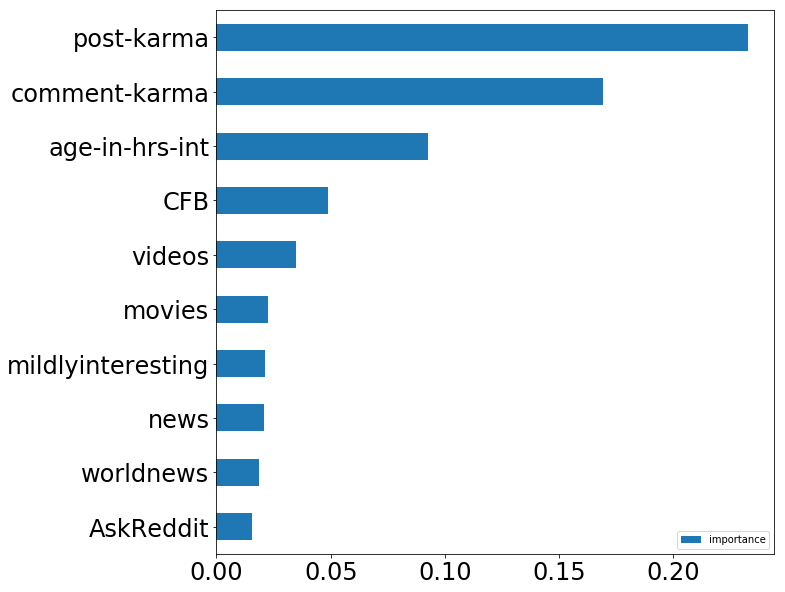

In [276]:
imp_top10.plot(kind='barh', fontsize=24, figsize=(10,10))

In [253]:
full_data.loc[full_data['user']=='2martin4u', 'comments'].max()

3232.0

In [277]:
from sklearn.linear_model import LogisticRegression

In [279]:
lg = LogisticRegression()
s = cross_val_score(lg, X, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Logistic Regression", s.mean().round(3), s.std().round(3)))

Logistic Regression Score:	0.852 ± 0.0


In [282]:
lg.fit(X,y) # https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model
imp = pd.DataFrame({'importance':abs(np.std(X,0)*lg.coef_[0])}, index=X.columns)
imp.sort_values(by='importance', ascending=False, inplace=True)
imp_top10 = imp.head(10)
imp_top10.sort_values(by='importance', ascending=True, inplace=True)

/Users/nmolivo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


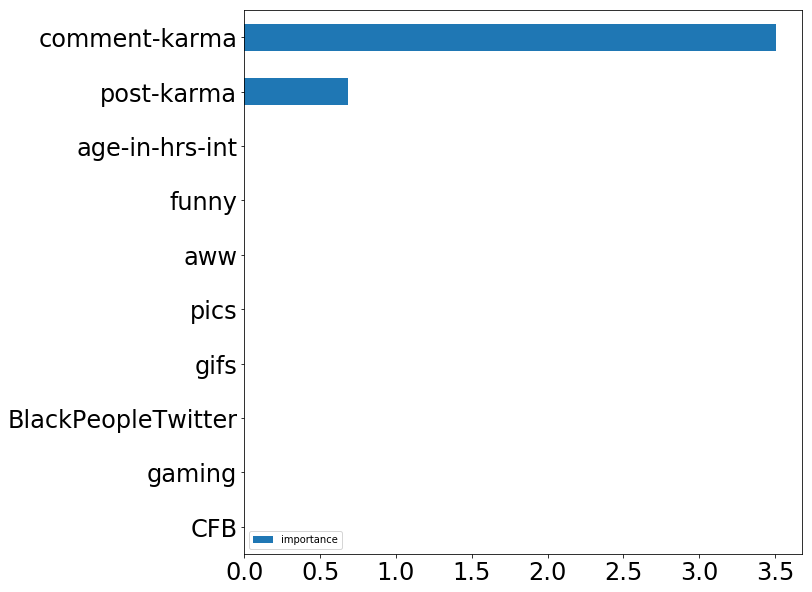

In [283]:
imp_top10.plot(kind='barh', fontsize=24, figsize=(10,10))

#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

In [285]:
## YOUR CODE HERE
full_data["cat"]=full_data["title"].str.contains("cat")
full_data["funny"]=full_data["title"].str.contains("funny")

In [378]:
model_data = full_data[["high-comments", "post-karma", 'comment-karma', "age-in-hrs-int", "subreddit", "cat", 
                        "funny", "title"]].dropna()
y = model_data['high-comments']
X_1 = pd.concat([model_data[["post-karma", 'comment-karma', "age-in-hrs-int", "cat", "funny"]], pd.get_dummies(model_data["subreddit"])]
               , axis=1)

In [290]:
rf = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(rf, X_1, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))) # doesn't help

Random Forest Score:	0.979 ± 0.001


In [ ]:
#My accuracy is the same and it increases my margin of error.

In [295]:
from sklearn.feature_extraction.text import CountVectorizer

In [315]:
title_data = model_data['title'].drop_duplicates()
title_data.head()

0    Requires 3 AAA batteries, in the most annoying...
1    [Postgame Thread] Ohio State Defeats Penn Stat...
2    Paint-chipping making the wheelchair guy look ...
3    This guy made a video of various rappers count...
4                 Lady at Yellowstone took our picture
Name: title, dtype: object

In [321]:
len(title_data)

2587

In [354]:
# words appearing in a minimum of 10 titles and a maximum of 80% of titles, with english stop words removed
# binary counts 1 for every title the word is in, 0 otherwise (means column sums of the dtm will equal document frequencies)
vectorizer = CountVectorizer(min_df=10, max_df=0.8, binary=True, stop_words='english') 
tvec = vectorizer.fit_transform(title_data) #creates document term matrix (dtm)

In [355]:
# get document frequencies of term
vocab = pd.DataFrame(list(zip(vectorizer.get_feature_names(), np.asarray(tvec.sum(axis=0)).ravel()))) # unravels 2d numpy array

In [362]:
# 20 most common terms
vocab.columns = ['word', 'doc_freq']
vocab.sort_values(by='doc_freq', ascending=False, inplace=True)
vocab.head(20)

,word,doc_freq
52,halloween,99
20,costume,67
60,just,64
66,like,60
86,new,58
169,year,52
144,time,49
40,game,46
103,post,46
31,don,42


In [379]:
# create new columns for top 20 words
for word in vocab.word[:20]:
    model_data[word] = model_data['title'].str.contains(word)
model_data.head()

,high-comments,post-karma,comment-karma,age-in-hrs-int,subreddit,cat,funny,title,halloween,costume,...,got,guy,man,best,today,love,oc,make,thread,old
0,0,8560.0,325.0,2,CrappyDesign,False,False,"Requires 3 AAA batteries, in the most annoying...",False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,313858.0,2845.0,3,CFB,False,False,[Postgame Thread] Ohio State Defeats Penn Stat...,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,7018.0,61.0,1,mildlyinteresting,False,False,Paint-chipping making the wheelchair guy look ...,False,False,...,False,True,True,False,False,False,False,False,False,True
3,1,22034.0,38536.0,3,videos,False,False,This guy made a video of various rappers count...,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0,7001.0,64.0,0,pics,False,False,Lady at Yellowstone took our picture,False,False,...,False,False,False,False,False,False,False,False,False,False


In [365]:
y = model_data['high-comments']
X_2 = pd.concat([model_data[["post-karma", 'comment-karma', "age-in-hrs-int", "cat", "funny"] + list(vocab.word[:20])], 
                 pd.get_dummies(model_data["subreddit"])], axis=1)

In [367]:
rf = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(rf, X_2, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))) 
# doesn't help (no change), if the models are equally good, we should use the model with the fewest variables

Random Forest Score:	0.979 ± 0.0


In [368]:
# what if we look at only top terms in the titles and none of the other variables
y = model_data['high-comments']
X_3 = model_data[list(vocab.word[:20])]
rf = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(rf, X_3, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))) # performs worse

Random Forest Score:	0.779 ± 0.002


In [380]:
# what if we look at only top terms in the titles and just subreddit
y = model_data['high-comments']
X_4 = pd.concat([model_data[list(vocab.word[:20])], pd.get_dummies(model_data["subreddit"])], axis=1)
rf = RandomForestClassifier(class_weight='balanced')
s = cross_val_score(rf, X_4, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3))) 
# performs better than just the title-based variables, but worse than the best performing model

Random Forest Score:	0.885 ± 0.002


#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [369]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [370]:
## YOUR CODE HERE
# See cross validation above for accuracy, I'll check some other metrics for my best performing model
model_data = full_data[["high-comments", "post-karma", 'comment-karma', "age-in-hrs-int", "subreddit"]].dropna()
y = model_data['high-comments']
X = pd.concat([model_data[["post-karma", 'comment-karma', "age-in-hrs-int"]], pd.get_dummies(model_data["subreddit"])]
               , axis=1)
cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)
rf = RandomForestClassifier(class_weight='balanced')

In [375]:
precisions=[]
recalls =[]
for train_ind, test_ind in cv:
    X_train = X.iloc[train_ind]
    X_test = X.iloc[test_ind]
    y_train = y.iloc[train_ind]
    y_test = y.iloc[test_ind]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    precisions.append(precision_score(y_test, y_pred)) # number true positive that are classified as positive over 
                                                        # all classified as positive
    recalls.append(recall_score(y_test, y_pred)) # number true positive that are classified as positive over all 
                                                # positive (classified or not)
print('Average precision {}, recall {}'.format(round(np.mean(precisions), 3), round(np.mean(recalls), 3),))

Average precision 0.889, recall 0.979


#### Repeat the model-building process with a non-tree-based method.

In [ ]:
## YOUR CODE HERE
# See Logistic Regression implemented above

#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
## YOUR CODE HERE
# Completed above, when taking into account karma and subreddit, these variables do not improve the predictive power of 
# the mode

# Executive Summary
---
Put your executive summary in a Markdown cell below.

We know that 'viral'-ness is a function of engagement and time since being posted. Our study determines that there are a few controllable factors that can help reach your viral goals.<br><Br>
While timing is important across the board, it's important to understand that specific subject matters have different peak times. For instance, current events peak at their inception or very close to right after they are posted. More static events or continual events (like College Football during college football season) can have a following with consistent engagement.<br><Br> We apply Logistic Regression to our variables "comments karma", "post karma", "age in hours", an "subreddit and get a pretty accurate model (about 77%) with little variance. However, an approach with fewer assumptions on the distribution of independent variables may yeild a more accurage graph.<Br><Br>Turns out Random Forest reigns supreme out of the two. Its flexibility, lack of assumptions about the data and reliance that it is indeed important to the output variable is key as Reddit post attributes are not neccessarily linearly related to engagement. We get a model with cross validation 97+% accuracy and 0 variance. Pretty good in the spectrum of online sensations.<br><br>We learned that who posts the post, matters. We learned that timely relevant posts have the capability to get a good spike. We also learned that particular words in the title did not improve our model projecting a post's ability to go viral.<Br><Br>I suggest 538 do one or many of the following options:<br>
1. Start building a brand now; the top influencers of posts with the most engagement were 'comment-karma' and 'post-karma'<Br>
2. While posting in preparation, plan a 'real' debut on Thanksgiving because it will take time to amass followers to take you to that sensational level.<br>
2a. Consider posting about sports. During football season, College Football and Fantasy Football are most popular subreddits and they consistently have a large following.<br>
2b. Consider posting what data science can reveal about Thanksgiving<br>
2c. Consider posting a cute picture<br>
2d. Maybe do all 3! Would not be unheard of in the Reddit Community<Br>
3. Consider if your goal to go viral is on brand. Some of the content on Reddit isn't what 538 does, and that's ok. The most rewarding experience will be acheived by staying true to who you are and finding your very own corner of Reddit that may never see sensational comment volume. <br><br>*Please see my powerpoint slides for a few examples of viral Reddit posts.

In [390]:
full_data['total'] = full_data["post-karma"]+full_data["comment-karma"]

In [389]:
full_data.sort_values("comments", ascending=False)[["title", "user", "comments", "subreddit"]].drop_duplicates("title")

,title,user,comments,subreddit
88843,Game Thread: World Series Game 5 ⚾ Dodgers (2-...,BaseballBot,35205.0,baseball
37302,[Game Thread] Penn State @ Ohio State Second H...,CFB_Referee,13340.0,CFB
35169,Happy Halloween 🎃,666Fearbot666,13338.0,trashy
36349,BoJack Horseman and Mr. Peanutbutter in the sa...,senor_flojo,13337.0,BoJackHorseman
12788,"Party on, Single life.",oliverclothessoff,13320.0,funny
99621,YouTube user demonstrating how Facebook listen...,AnimalCrust,10851.0,videos
24988,Brigmore Witch by Eric Tan,net-diver,9919.0,ImaginaryWitches
1399,[Game Thread] Penn State @ Ohio State (3:30PM ET),CFB_Referee,9654.0,CFB
79385,‘MURICA!,sacredvampire,9541.0,MURICA
39873,"Redditors with a Ph.D./Master's, what is a TL;...",Emprythius,8850.0,AskReddit


### BONUS
Refer to the README for the bonus parts

In [ ]:
## YOUR CODE HERE